## 01. Import Libraries

In [36]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

## 02. Import data

In [164]:
# import data

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)

In [165]:
# quick check

df.head()

ride_id  rideable_type           started_at             ended_at  \
0  98E8B6334EDA291D  electric_bike  2022-01-01 20:05:31  2022-01-01 20:11:44   
1  36588BE94C9C8F68   classic_bike  2022-01-01 16:21:05  2022-01-01 17:15:46   
2  8492C44EA573AB43   classic_bike  2022-01-01 09:15:25  2022-01-01 09:30:15   
3  2EE9E7BF156DF3D6  electric_bike  2022-01-01 17:04:06  2022-01-01 17:17:57   
4  D78B954095CBA610   classic_bike  2022-01-01 15:52:39  2022-01-01 16:02:36   

     start_station_name start_station_id       end_station_name  \
0  8 St & Washington St            HB603        Adams St & 2 St   
1    Liberty Light Rail            JC052     Liberty Light Rail   
2          Newport Pkwy            JC008       Hudson St & 4 St   
3               Sip Ave            JC056  Baldwin at Montgomery   
4        Journal Square            JC103         Pershing Field   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  \
0          HB407  40.745984 -74.028199  40.739814 -74.036904        member   
1          JC052  40.711242 -74.055701  40.711242 -74.055701        casual   
2          HB607  40.728745 -74.032108  40.740973 -74.028603        member   
3          JC020  40.730897 -74.063913  40.723659 -74.064194        casual   
4          JC024  40.733670 -74.062500  40.742677 -74.051789        casual   

         date  average_temp  daily_ride_count _merge  
0  2022-01-01          11.6               581   both  
1  2022-01-01          11.6               581   both  
2  2022-01-01          11.6               581   both  
3  2022-01-01          11.6               581   both  
4  2022-01-01          11.6               581   both

In [168]:
# going to drop the merge column, then check data types (and make sure date is in date time format!)

df = df.drop(columns = ['_merge'])
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
average_temp          float64
daily_ride_count        int64
dtype: object

In [170]:
# making date column into date time!

df['date'] = pd.to_datetime(df['date'])
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
average_temp                 float64
daily_ride_count               int64
dtype: object

In [47]:
# things look good! onto the next step!

## 03. Data Visualizations

In [318]:
# before we start our visualizations, let's set a theme for our charts so they are  ~cohesive~
# after taking a closer look at cityBike branding, I am going to opt for a palette that contains blues, as it is more personalized to the client 
# (citibike also has red in their logo)

# also want to consider accessibility, so considering a palette that will be user friendly to those experiencing color blindness

# sns.color_palette(palette='PuBu')
# sns.color_palette(palette='RdBu') -> will likely use this one!

sns.set_palette(palette='RdBu')

In [55]:
# let's start by seeing how many users are in each category (members vs casual users)

df['member_casual'].value_counts()

member_casual
member    586819
casual    304473
Name: count, dtype: int64

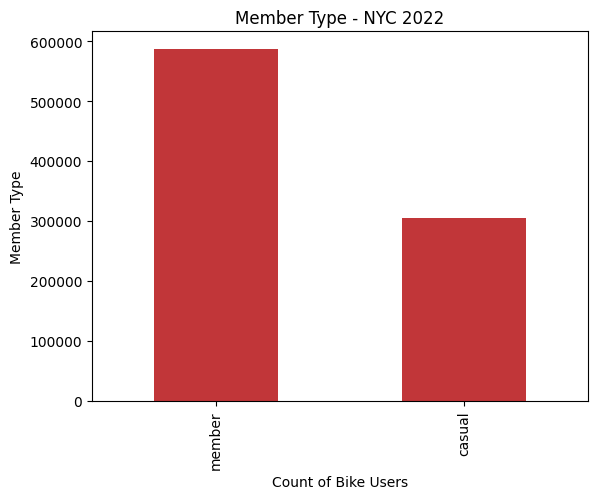

In [320]:
# while this gives us good info, we can also view this as a bar chart (which can be interpreted more quickly)

df['member_casual'].value_counts().plot(kind = 'bar')

# now let's add labels

plt.xlabel('Count of Bike Users')
plt.ylabel('Member Type')
plt.title('Member Type - NYC 2022')

plt.show()

In [79]:
# this is much better! now let's investigate the data for other insights
# it could be helpful to know which stations are the most popular!
# lets create a new dataframe with just our top 20 starting stations (going to use the grouping method)

# first we are creating a  new column in our dataframe, and setting the value to 1
# this indicates that the first instance of each station will having a starting count of 1
# as we go through the dataframe, this will increase

df['value'] = 1
df_top20start = df.groupby('start_station_name')['value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20start = df_top20start.nlargest(20, 'value')
top20start

start_station_name  value
37                                 Grove St PATH  42448
75  South Waterfront Walkway - Sinatra Dr & 1 St  34110
44       Hoboken Terminal - River St & Hudson Pl  32885
43      Hoboken Terminal - Hudson St & Hudson Pl  30155
22              City Hall - Washington St & 1 St  23208
69                                  Newport Pkwy  21892
38                                 Hamilton Park  20419
68                                  Newport PATH  19902
42                    Hoboken Ave at Monmouth St  19443
61                              Marin Light Rail  19116
1                           12 St & Sinatra Dr N  16996
2              14 St Ferry - 14 St & Shipyard Ln  16938
25                    Columbus Dr at Exchange Pl  16658
45                              Hudson St & 4 St  15825
39                                    Harborside  15646
0                          11 St & Washington St  15436
81                                 Washington St  15019
54                            Liberty Light Rail  14484
7                           8 St & Washington St  14364
57                             Madison St & 1 St  14095

In [81]:
# looks good! going to repeat this for the top 20 ending stations as well!
# recycling code from above with a few modifications!

df['value_end'] = 1
df_top20end = df.groupby('end_station_name')['value_end'].count().reset_index()
top20end = df_top20end.nlargest(20, 'value_end')
top20end

end_station_name  value_end
38                                 Grove St PATH      44730
77  South Waterfront Walkway - Sinatra Dr & 1 St      34750
45       Hoboken Terminal - River St & Hudson Pl      32417
44      Hoboken Terminal - Hudson St & Hudson Pl      30220
22              City Hall - Washington St & 1 St      23591
70                                  Newport Pkwy      21800
39                                 Hamilton Park      20716
43                    Hoboken Ave at Monmouth St      20168
69                                  Newport PATH      19858
62                              Marin Light Rail      18896
2              14 St Ferry - 14 St & Shipyard Ln      17585
1                           12 St & Sinatra Dr N      17518
25                    Columbus Dr at Exchange Pl      17315
40                                    Harborside      15880
46                              Hudson St & 4 St      15793
0                          11 St & Washington St      15471
83                                 Washington St      15178
55                            Liberty Light Rail      14741
21                                     City Hall      14617
82                                     Warren St      13932

In [83]:
# interestingly enough, it lools like there is some overlap!
# this can give valuable info into rider activity!
# now let's chart these!

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/3638175835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20start, x = 'value', y = 'start_station_name', palette=("RdBu"))


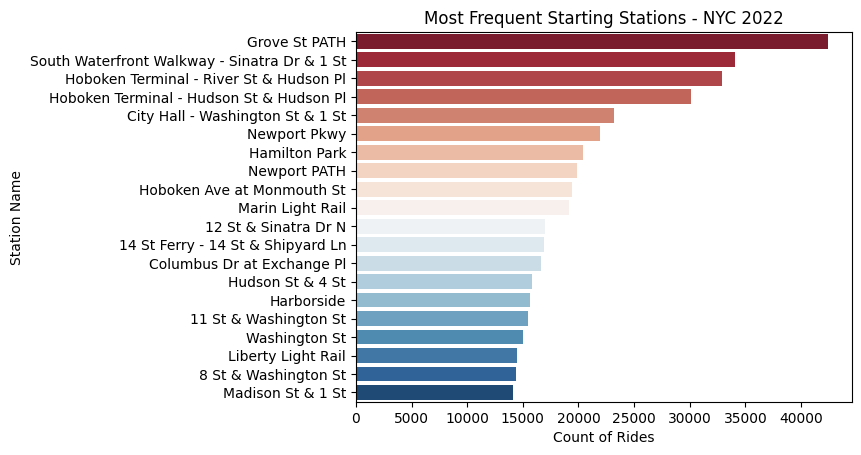

In [322]:
# going to use seaborn and the above palette!
# sns.color_palette(palette='RdBu')

sns.barplot(data = top20start, x = 'value', y = 'start_station_name', palette=("RdBu"))

# let's add some labels!
plt.title("Most Frequent Starting Stations - NYC 2022")
plt.ylabel("Station Name")
plt.xlabel("Count of Rides")
plt.show()

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/2281407248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20end, x = 'value_end', y = 'end_station_name', palette=("RdBu"))


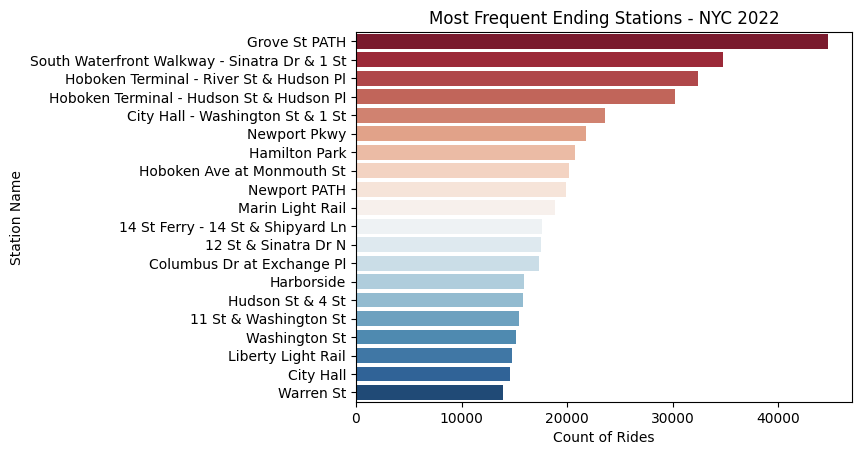

In [113]:
# looks good! let's repeat for our end stations :)
# recycling our above code, with some modifications

sns.barplot(data = top20end, x = 'value_end', y = 'end_station_name', palette=("RdBu"))

# let's add some labels!
plt.title("Most Frequent Ending Stations - NYC 2022")
plt.ylabel("Station Name")
plt.xlabel("Count of Rides")
plt.show()

In [117]:
# these look good! going to recreate the dual axis plot from the last notebook using seaborn!

# this was a line plot with daily average temperature and ride count per day
# we made sure that the date column was in date-time format already
# the next step is to make a new dataframe with the date as our axis!

df_temp = df.set_index('date')
df_temp

ride_id  rideable_type           started_at  \
date                                                               
2022-01-01  98E8B6334EDA291D  electric_bike  2022-01-01 20:05:31   
2022-01-01  36588BE94C9C8F68   classic_bike  2022-01-01 16:21:05   
2022-01-01  8492C44EA573AB43   classic_bike  2022-01-01 09:15:25   
2022-01-01  2EE9E7BF156DF3D6  electric_bike  2022-01-01 17:04:06   
2022-01-01  D78B954095CBA610   classic_bike  2022-01-01 15:52:39   
...                      ...            ...                  ...   
2022-12-31  767F26062A1B8BE6   classic_bike  2022-12-31 13:59:12   
2022-12-31  060E978BA456AF09  electric_bike  2022-12-31 10:38:55   
2022-12-31  E3522090A963CA75   classic_bike  2022-12-31 15:58:18   
2022-12-31  767DCD249B3F2506   classic_bike  2022-12-31 15:26:17   
2022-12-31  AF19704853DAC9B2   classic_bike  2022-12-31 11:00:57   

                       ended_at                            start_station_name  \
date                                                                            
2022-01-01  2022-01-01 20:11:44                          8 St & Washington St   
2022-01-01  2022-01-01 17:15:46                            Liberty Light Rail   
2022-01-01  2022-01-01 09:30:15                                  Newport Pkwy   
2022-01-01  2022-01-01 17:17:57                                       Sip Ave   
2022-01-01  2022-01-01 16:02:36                                Journal Square   
...                         ...                                           ...   
2022-12-31  2022-12-31 14:06:34              City Hall - Washington St & 1 St   
2022-12-31  2022-12-31 10:41:36                            Madison St & 10 St   
2022-12-31  2022-12-31 16:01:27                            Madison St & 10 St   
2022-12-31  2022-12-31 15:39:34  South Waterfront Walkway - Sinatra Dr & 1 St   
2022-12-31  2022-12-31 11:09:38                       Communipaw & Berry Lane   

           start_station_id       end_station_name end_station_id  start_lat  \
date                                                                           
2022-01-01            HB603        Adams St & 2 St          HB407  40.745984   
2022-01-01            JC052     Liberty Light Rail          JC052  40.711242   
2022-01-01            JC008       Hudson St & 4 St          HB607  40.728745   
2022-01-01            JC056  Baldwin at Montgomery          JC020  40.730897   
2022-01-01            JC103         Pershing Field          JC024  40.733670   
...                     ...                    ...            ...        ...   
2022-12-31            HB105       Grand St & 14 St          HB506  40.737182   
2022-12-31            HB503       Grand St & 14 St          HB506  40.749943   
2022-12-31            HB503       Grand St & 14 St          HB506  40.749943   
2022-12-31            HB103       Grand St & 14 St          HB506  40.736982   
2022-12-31            JC084              City Hall          JC003  40.714456   

            start_lng    end_lat    end_lng member_casual  average_temp  \
date                                                                      
2022-01-01 -74.028199  40.739814 -74.036904        member          11.6   
2022-01-01 -74.055701  40.711242 -74.055701        casual          11.6   
2022-01-01 -74.032108  40.740973 -74.028603        member          11.6   
2022-01-01 -74.063913  40.723659 -74.064194        casual          11.6   
2022-01-01 -74.062500  40.742677 -74.051789        casual          11.6   
...               ...        ...        ...           ...           ...   
2022-12-31 -74.031113  40.754090 -74.031600        casual           8.2   
2022-12-31 -74.035865  40.754090 -74.031600        member           8.2   
2022-12-31 -74.035865  40.754090 -74.031600        member           8.2   
2022-12-31 -74.027781  40.754090 -74.031600        casual           8.2   
2022-12-31 -74.066676  40.717732 -74.043845        member           8.2   

            daily_ride_count  value  value_end  
date            

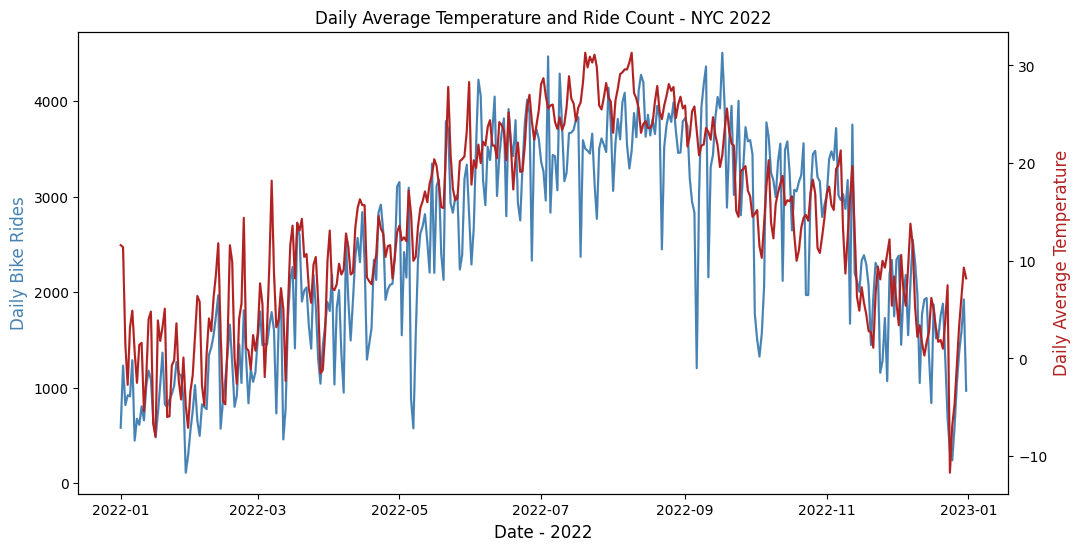

In [131]:
# perfect, now we will be using df_temp to create our linegraph!

fig,ax = plt.subplots(figsize = (12,6))

# plotting rides
sns.lineplot(data = df_temp['daily_ride_count'], color = 'steelblue')
ax.set_xlabel("Date - 2022", fontsize = 12)
ax.set_ylabel("Daily Bike Rides", fontsize = 12, color = 'steelblue')

# plotting temp
ax2 = ax.twinx()
sns.lineplot(data = df_temp['average_temp'], color = 'firebrick')
ax2.set_ylabel("Daily Average Temperature", fontsize = 12, color = 'firebrick')

plt.title("Daily Average Temperature and Ride Count - NYC 2022")
plt.show()

In [172]:
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  98E8B6334EDA291D  electric_bike  2022-01-01 20:05:31  2022-01-01 20:11:44   
1  36588BE94C9C8F68   classic_bike  2022-01-01 16:21:05  2022-01-01 17:15:46   
2  8492C44EA573AB43   classic_bike  2022-01-01 09:15:25  2022-01-01 09:30:15   
3  2EE9E7BF156DF3D6  electric_bike  2022-01-01 17:04:06  2022-01-01 17:17:57   
4  D78B954095CBA610   classic_bike  2022-01-01 15:52:39  2022-01-01 16:02:36   

     start_station_name start_station_id       end_station_name  \
0  8 St & Washington St            HB603        Adams St & 2 St   
1    Liberty Light Rail            JC052     Liberty Light Rail   
2          Newport Pkwy            JC008       Hudson St & 4 St   
3               Sip Ave            JC056  Baldwin at Montgomery   
4        Journal Square            JC103         Pershing Field   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  \
0          HB407  40.745984 -74.028199  40.739814 -74.036904        member   
1          JC052  40.711242 -74.055701  40.711242 -74.055701        casual   
2          HB607  40.728745 -74.032108  40.740973 -74.028603        member   
3          JC020  40.730897 -74.063913  40.723659 -74.064194        casual   
4          JC024  40.733670 -74.062500  40.742677 -74.051789        casual   

        date  average_temp  daily_ride_count  
0 2022-01-01          11.6               581  
1 2022-01-01          11.6               581  
2 2022-01-01          11.6               581  
3 2022-01-01          11.6               581  
4 2022-01-01          11.6               581

In [198]:
# make a box plot of one of the categorical variables:
# i think it would be useful to check out the trip length, but first, we will need to make a new column and do some math
# lets make sure that the starting and ending time columns are in date-time format:

df1 = df 

df1['started_at'] = pd.to_datetime(df1['started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df1.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
date                   datetime64[ns]
average_temp                  float64
daily_ride_count                int64
start_time             datetime64[ns]
end_time               datetime64[ns]
trip_length                   float64
trip_length_seconds           float64
trip_length_minutes           float64
dtype: object

In [200]:
# now we can create new columns for trip length (seconds and minutes)

df1['trip_length_seconds'] = (df1['end_time'] - df1['start_time']).dt.total_seconds()
df1['trip_length_minutes'] = (df1['end_time'] - df1['start_time']).dt.total_seconds() / 60

df1

ride_id  rideable_type          started_at  \
0       98E8B6334EDA291D  electric_bike 2022-01-01 20:05:31   
1       36588BE94C9C8F68   classic_bike 2022-01-01 16:21:05   
2       8492C44EA573AB43   classic_bike 2022-01-01 09:15:25   
3       2EE9E7BF156DF3D6  electric_bike 2022-01-01 17:04:06   
4       D78B954095CBA610   classic_bike 2022-01-01 15:52:39   
...                  ...            ...                 ...   
891287  767F26062A1B8BE6   classic_bike 2022-12-31 13:59:12   
891288  060E978BA456AF09  electric_bike 2022-12-31 10:38:55   
891289  E3522090A963CA75   classic_bike 2022-12-31 15:58:18   
891290  767DCD249B3F2506   classic_bike 2022-12-31 15:26:17   
891291  AF19704853DAC9B2   classic_bike 2022-12-31 11:00:57   

                  ended_at                            start_station_name  \
0      2022-01-01 20:11:44                          8 St & Washington St   
1      2022-01-01 17:15:46                            Liberty Light Rail   
2      2022-01-01 09:30:15                                  Newport Pkwy   
3      2022-01-01 17:17:57                                       Sip Ave   
4      2022-01-01 16:02:36                                Journal Square   
...                    ...                                           ...   
891287 2022-12-31 14:06:34              City Hall - Washington St & 1 St   
891288 2022-12-31 10:41:36                            Madison St & 10 St   
891289 2022-12-31 16:01:27                            Madison St & 10 St   
891290 2022-12-31 15:39:34  South Waterfront Walkway - Sinatra Dr & 1 St   
891291 2022-12-31 11:09:38                       Communipaw & Berry Lane   

       start_station_id       end_station_name end_station_id  start_lat  \
0                 HB603        Adams St & 2 St          HB407  40.745984   
1                 JC052     Liberty Light Rail          JC052  40.711242   
2                 JC008       Hudson St & 4 St          HB607  40.728745   
3                 JC056  Baldwin at Montgomery          JC020  40.730897   
4                 JC103         Pershing Field          JC024  40.733670   
...                 ...                    ...            ...        ...   
891287            HB105       Grand St & 14 St          HB506  40.737182   
891288            HB503       Grand St & 14 St          HB506  40.749943   
891289            HB503       Grand St & 14 St          HB506  40.749943   
891290            HB103       Grand St & 14 St          HB506  40.736982   
891291            JC084              City Hall          JC003  40.714456   

        start_lng  ...    end_lng  member_casual       date average_temp  \
0      -74.028199  ... -74.036904         member 2022-01-01         11.6   
1      -74.055701  ... -74.055701         casual 2022-01-01         11.6   
2      -74.032108  ... -74.028603         member 2022-01-01         11.6   
3      -74.063913  ... -74.064194         casual 2022-01-01         11.6   
4      -74.062500  ... -74.051789         casual 2022-01-01         11.6   
...           ...  ...        ...            ...        ...          ...   
891287 -74.031113  ... -74.031600         casual 2022-12-31          8.2   
891288 -74.035865  ... -74.031600         member 2022-12-31          8.2   
891289 -74.035865  ... -74.031600         member 2022-12-31          8.2   
891290 -74.027781  ... -74.031600         casual 2022-12-31          8.2   
891291 -74.066676  ... -74.043845         member 2022-12-31          8.2   

        daily_ride_count          start_time            end_time trip_length  \
0                    581 2022-01-01 20:05:31 2022-01-01 20:11:44       373.0   
1                    581 2022-01-01 16:21:05 2022-01-01 17:15:46      3281.0   
2                    581 2022-01-01 09:15:25 2022-01-01 09:30:15       890.0   
3                    581 2022-01-01 17:04:06 2022-01-01 17:17:57       831.0   
4                    581 2022-01-01 15:52:39 2022-01-01 16:02:36       597.0   
...                  ...                 

In [208]:
# let's clean this up a bit and save it, then keep moving. dropping the start and end time columns as they are repetitive!
# probably don't need how long each ride was in seconds, either

# df1 = df1.drop(columns = ['start_time', 'end_time'])
df1 = df1.drop(columns = ['trip_length_seconds'])
df1

ride_id  rideable_type          started_at  \
0       98E8B6334EDA291D  electric_bike 2022-01-01 20:05:31   
1       36588BE94C9C8F68   classic_bike 2022-01-01 16:21:05   
2       8492C44EA573AB43   classic_bike 2022-01-01 09:15:25   
3       2EE9E7BF156DF3D6  electric_bike 2022-01-01 17:04:06   
4       D78B954095CBA610   classic_bike 2022-01-01 15:52:39   
...                  ...            ...                 ...   
891287  767F26062A1B8BE6   classic_bike 2022-12-31 13:59:12   
891288  060E978BA456AF09  electric_bike 2022-12-31 10:38:55   
891289  E3522090A963CA75   classic_bike 2022-12-31 15:58:18   
891290  767DCD249B3F2506   classic_bike 2022-12-31 15:26:17   
891291  AF19704853DAC9B2   classic_bike 2022-12-31 11:00:57   

                  ended_at                            start_station_name  \
0      2022-01-01 20:11:44                          8 St & Washington St   
1      2022-01-01 17:15:46                            Liberty Light Rail   
2      2022-01-01 09:30:15                                  Newport Pkwy   
3      2022-01-01 17:17:57                                       Sip Ave   
4      2022-01-01 16:02:36                                Journal Square   
...                    ...                                           ...   
891287 2022-12-31 14:06:34              City Hall - Washington St & 1 St   
891288 2022-12-31 10:41:36                            Madison St & 10 St   
891289 2022-12-31 16:01:27                            Madison St & 10 St   
891290 2022-12-31 15:39:34  South Waterfront Walkway - Sinatra Dr & 1 St   
891291 2022-12-31 11:09:38                       Communipaw & Berry Lane   

       start_station_id       end_station_name end_station_id  start_lat  \
0                 HB603        Adams St & 2 St          HB407  40.745984   
1                 JC052     Liberty Light Rail          JC052  40.711242   
2                 JC008       Hudson St & 4 St          HB607  40.728745   
3                 JC056  Baldwin at Montgomery          JC020  40.730897   
4                 JC103         Pershing Field          JC024  40.733670   
...                 ...                    ...            ...        ...   
891287            HB105       Grand St & 14 St          HB506  40.737182   
891288            HB503       Grand St & 14 St          HB506  40.749943   
891289            HB503       Grand St & 14 St          HB506  40.749943   
891290            HB103       Grand St & 14 St          HB506  40.736982   
891291            JC084              City Hall          JC003  40.714456   

        start_lng    end_lat    end_lng member_casual       date  \
0      -74.028199  40.739814 -74.036904        member 2022-01-01   
1      -74.055701  40.711242 -74.055701        casual 2022-01-01   
2      -74.032108  40.740973 -74.028603        member 2022-01-01   
3      -74.063913  40.723659 -74.064194        casual 2022-01-01   
4      -74.062500  40.742677 -74.051789        casual 2022-01-01   
...           ...        ...        ...           ...        ...   
891287 -74.031113  40.754090 -74.031600        casual 2022-12-31   
891288 -74.035865  40.754090 -74.031600        member 2022-12-31   
891289 -74.035865  40.754090 -74.031600        member 2022-12-31   
891290 -74.027781  40.754090 -74.031600        casual 2022-12-31   
891291 -74.066676  40.717732 -74.043845        member 2022-12-31   

        average_temp  daily_ride_count  trip_length  trip_length_minutes  
0               11.6               581        373.0             6.216667  
1               11.6               581       3281.0            54.683333  
2               11.6               581        890.0            14.833333  
3               11.6               581        831.0            13.850000  
4               11.6               581        597.0             9.950000  
...              ...               ...          ...                  ...  
891287           8.2               968        442.0             7.366667  
891288           

In [211]:
# cool! let's save this, then work on the box plot :)

df1.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_with_ride_length.csv')

In [214]:
df1.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'average_temp', 'daily_ride_count',
       'trip_length', 'trip_length_minutes'],
      dtype='object')

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/768928549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df1, palette = "RdBu")


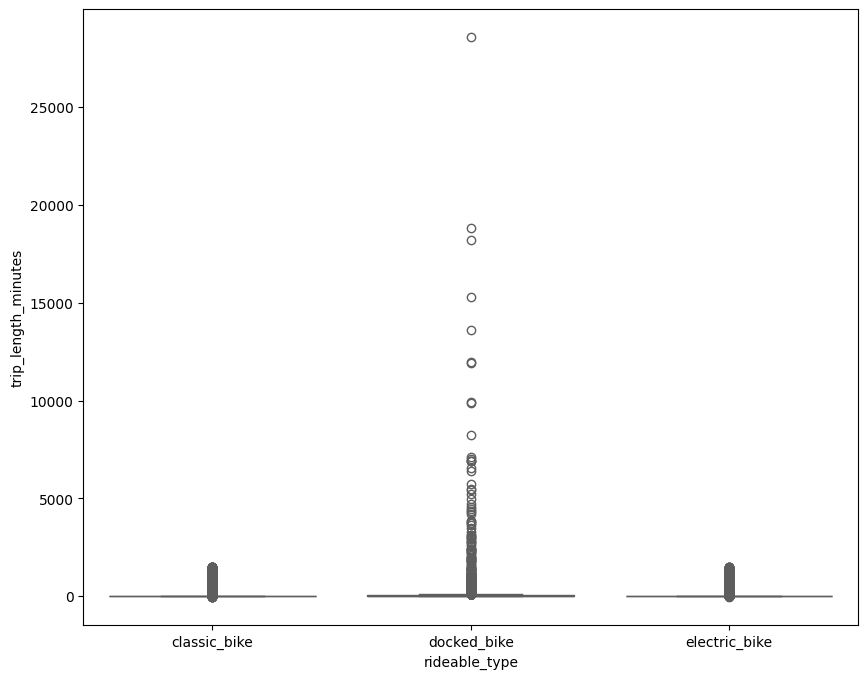

In [324]:
# it might be interesting to see if ride length differs by bike type!
# our three bike types are electric_bike, docked_bike and classic_bike
# will also use trip_length_minutes column

plt.figure(figsize=(10,8))
sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df1, palette = "RdBu")
plt.show()

In [226]:
# this didn't show up as expected, lets check data types and make modifications if needed:

df1.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
date                   datetime64[ns]
average_temp                  float64
daily_ride_count                int64
trip_length                   float64
trip_length_minutes           float64
dtype: object

In [228]:
# probably need to make rideable_type and member_casual into category types:

df1['member_casual'] = df1['member_casual'].astype('category')
df1['rideable_type'] = df1['rideable_type'].astype('category')
df1.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
date                   datetime64[ns]
average_temp                  float64
daily_ride_count                int64
trip_length                   float64
trip_length_minutes           float64
dtype: object

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/1060407140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df1, palette = "RdBu", showfliers=False)


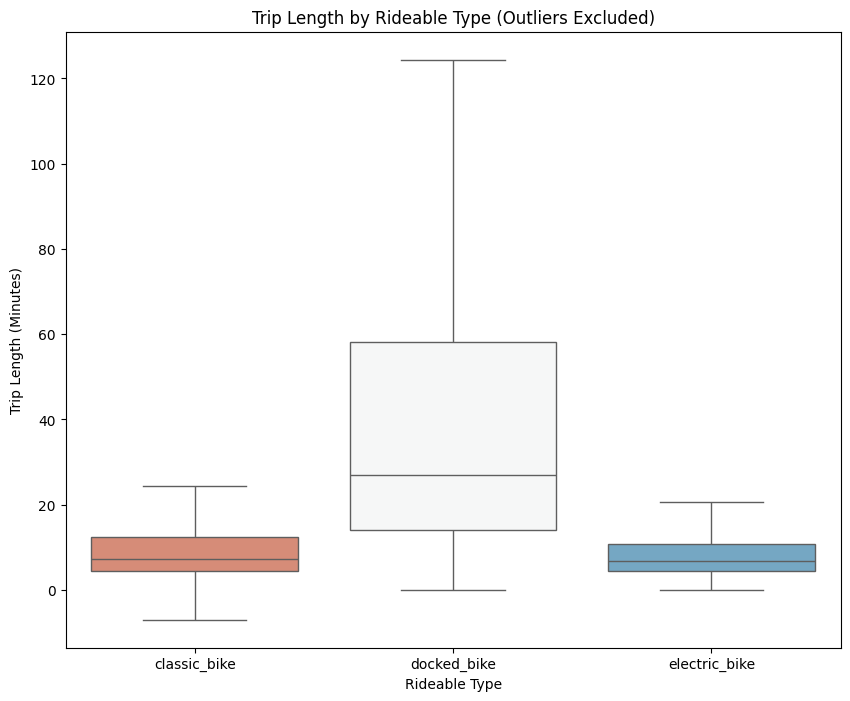

In [238]:
# cool, let's try the above plot again (then repeat with member type), and exclude our outliers

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df1, palette = "RdBu", showfliers=False)
plt.title('Trip Length by Rideable Type (Outliers Excluded)')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

When assessing the three rideable types (docked, classic, electric) it can be seen that docked bikes have the highest average ride length, as well as the largest range of trip length. This could be because of a larger number of those bikes being available or due to the nature of the bike itself (needing to be returned to a dock/station). Classic bikes, unsurprisingly have the lowest ride time (pedals are less fun and require more energy expenditure). By understanding how many of each bike type we have, we can gather additional insights to see if there is actually user preference for docked bikes or if there are simply more of them... Will do a check with counts below, then reasses! Interestingly enough, the docked bikes have a much smaller sample size than the other two types, this could indicate that the data is skewed and as more of these bikes become available, ride length will be more similar to the other two rideable types.

In [247]:
df1['rideable_type'].value_counts()

rideable_type
classic_bike     624392
electric_bike    259322
docked_bike        7578
Name: count, dtype: int64

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/619432885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df1, palette = "RdBu", showfliers = False)


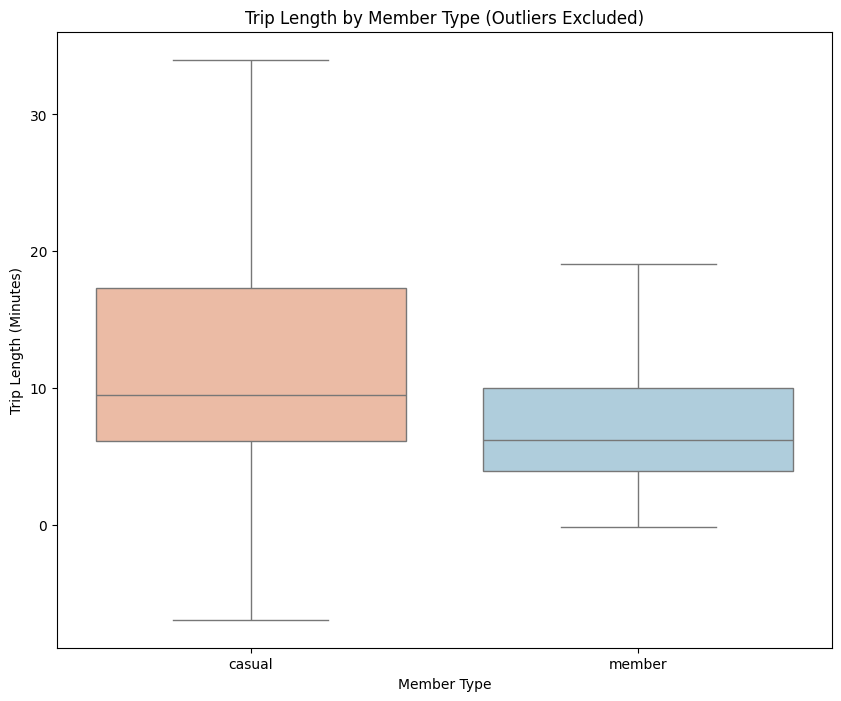

In [250]:
# now, let's do this for member type

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df1, palette = "RdBu", showfliers = False)
plt.title('Trip Length by Member Type (Outliers Excluded)')
plt.xlabel('Member Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

The above shows that casual users have an average trip length that is longer than members, and a wider range of trip lengths as well. This could be explained by the fact that NYC sees a lot of tourist activity, with riders that are not as likely to have a citibike membership (due to unavailability in their home area). Tourists might be more likely to "adventure" and bike around a city, while members might use the bikes as their primary mode of transportation to/from, keeping rides shorter and more purposeful.

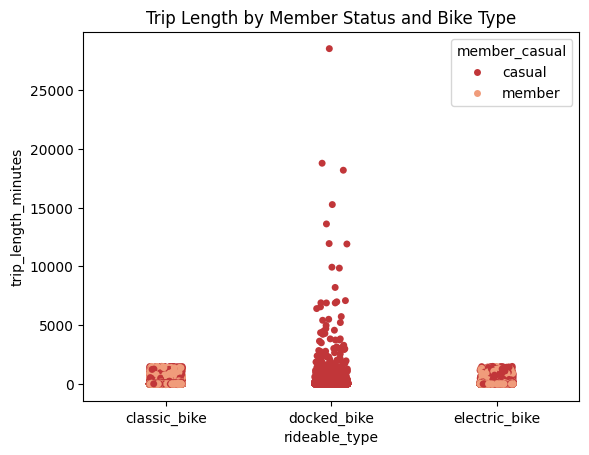

In [326]:
# let's do a quick strip plot with the above variables!

sns.stripplot(x = 'rideable_type', y = 'trip_length_minutes', data = df1, hue = 'member_casual')

plt.title('Trip Length by Member Status and Bike Type')
plt.show()

Interestingly enough, ONLY casual users appear to use the docked bikes, and more members are liekly to use the classic bikes. 

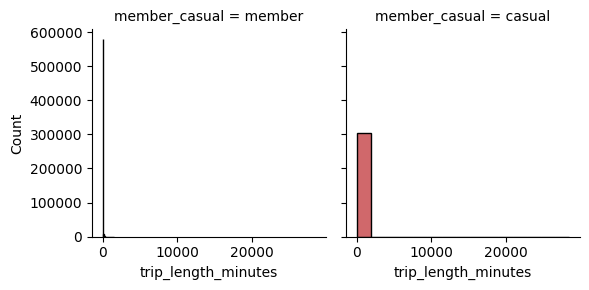

In [328]:
# time to build a facetGrid! We're going to stick with the member type variable for this 

grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "trip_length_minutes", bins = 15)

In [260]:
# looks like we need to clean the data a little better to remove outliers in our trip length...

df1['trip_length_minutes'].describe()

count    891292.000000
mean         13.563545
std          72.892527
min         -55.516667
25%           4.500000
50%           7.183333
75%          12.116667
max       28541.500000
Name: trip_length_minutes, dtype: float64

In [262]:
# we will create a new dataframe so our changes aren't permanent. to exclude outliers we're going to use the IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df['trip_length_minutes'].quantile(0.25)
Q3 = df['trip_length_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df1[(df1['trip_length_minutes'] >= lower_thresh) & (df['trip_length_minutes'] <= upper_thresh)]
df2['trip_length_minutes'].describe()

count    802020.000000
mean          7.713157
std           4.797287
min          -6.916667
25%           4.250000
50%           6.566667
75%          10.016667
max          23.533333
Name: trip_length_minutes, dtype: float64

In [265]:
# this did remove 90k entries, which is a huge portion of the data set, so lets try another method.

df1['trip_length_minutes'].value_counts()

trip_length_minutes
4.616667       1585
5.016667       1575
5.000000       1573
5.100000       1567
4.283333       1567
               ... 
1022.616667       1
959.866667        1
198.733333        1
969.916667        1
110.283333        1
Name: count, Length: 11524, dtype: int64

In [270]:
df3 = df1.sort_values(by='trip_length_minutes')
df3['trip_length_minutes'].value_counts()

trip_length_minutes
4.616667        1585
5.016667        1575
5.000000        1573
4.283333        1567
5.100000        1567
                ... 
168.450000         1
168.350000         1
168.316667         1
168.250000         1
28541.500000       1
Name: count, Length: 11524, dtype: int64

In [279]:
# lets go ahead and remove anything that seems unreasonable... 
# a good starting point is to remove rides over 24 hours long ( 1440 minutes)

df3 = df3[df3['trip_length_minutes'] < 1440]
df3['trip_length_minutes'].value_counts()

trip_length_minutes
4.616667       1585
5.016667       1575
5.000000       1573
5.100000       1567
4.283333       1567
               ... 
166.933333        1
167.016667        1
167.050000        1
167.100000        1
1438.250000       1
Name: count, Length: 11419, dtype: int64

In [285]:
df3.tail(10)

ride_id  rideable_type          started_at  \
714982  B4B61BF50101961D   classic_bike 2022-10-13 16:53:41   
437098  F6631B1A98E51992  electric_bike 2022-07-24 14:32:49   
612337  B63B2A56AD45FEE3   classic_bike 2022-09-11 11:56:16   
500814  97DFB8FE699F3472   classic_bike 2022-08-11 21:27:44   
788783  E2F0C48DBD2612B2  electric_bike 2022-11-06 16:47:07   
663607  5E186ABE24161401    docked_bike 2022-09-25 19:26:55   
715460  D5A1BAFC9C43379F  electric_bike 2022-10-13 15:48:35   
128328  7CEE0E8014CBEF0C  electric_bike 2022-04-11 19:18:15   
619483  B39E6A6E62384C34  electric_bike 2022-09-13 16:06:08   
668533  264413F800203244   classic_bike 2022-09-27 17:53:41   

                  ended_at                       start_station_name  \
714982 2022-10-14 16:37:37                            Grove St PATH   
437098 2022-07-25 14:17:09                    Bloomfield St & 15 St   
612337 2022-09-12 11:41:10                        Madison St & 1 St   
500814 2022-08-12 21:12:45            9 St HBLR - Jackson St & 8 St   
788783 2022-11-07 16:32:33  Hoboken Terminal - River St & Hudson Pl   
663607 2022-09-26 19:14:37            9 St HBLR - Jackson St & 8 St   
715460 2022-10-14 15:37:11                         Hudson St & 4 St   
128328 2022-04-12 19:12:40                       Liberty Light Rail   
619483 2022-09-14 16:02:37                                 Union St   
668533 2022-09-28 17:51:56                             Glenwood Ave   

       start_station_id                              end_station_name  \
714982            JC005                                Van Vorst Park   
437098            HB203                               4 St & Grand St   
612337            HB402  South Waterfront Walkway - Sinatra Dr & 1 St   
500814            HB305                              Heights Elevator   
788783            HB102                            Madison St & 10 St   
663607            HB305                          12 St & Sinatra Dr N   
715460            HB607                              Grand St & 14 St   
128328            JC052                                     City Hall   
619483            JC051                                  Glenwood Ave   
668533            JC094                                  Glenwood Ave   

       end_station_id  start_lat  start_lng    end_lat    end_lng  \
714982          JC035  40.719586 -74.043117  40.718489 -74.047727   
437098          HB301  40.754530 -74.026580  40.742258 -74.035111   
612337          HB103  40.738790 -74.039300  40.736982 -74.027781   
500814          JC059  40.747907 -74.038412  40.748716 -74.040443   
788783          HB503  40.736068 -74.029127  40.749943 -74.035865   
663607          HB201  40.747907 -74.038412  40.750604 -74.024020   
715460          HB506  40.740973 -74.028603  40.754090 -74.031600   
128328          JC003  40.711242 -74.055701  40.717732 -74.043845   
619483          JC094  40.718211 -74.083639  40.727551 -74.071061   
668533          JC094  40.727551 -74.071061  40.727551 -74.071061   

       member_casual       date  average_temp  daily_ride_count  trip_length  \
714982        member 2022-10-13          18.7              2120      85436.0   
437098        casual 2022-07-24          31.1              3142      85460.0   
612337        casual 2022-09-11          23.2              2157      85494.0   
500814        casual 2022-08-11          26.6              3624      85501.0   
788783        casual 2022-11-06          19.8              3017      85526.0   
663607        casual 2022-09-25          19.2              2807      85662.0   
715460        member 2022-10-13          18.7              2120      85716.0   
128328        casual 2022-04-11           8.8              1921      86065.0   
619483        casual 2022-09-13          24.7              3444      86189.0   
668533        casual 2022-09-27          19.7              3730      86295.0   

        trip_length_minutes  
714982          1423.933333  
437098          1424.333333  
612337

In [291]:
# while this isn't perfect, it is better! let's export this in case we need it again..

# df3 = df3.drop(columns = ['trip_length'])
df3 = df3.sort_values(by='date')
df3.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/trip_length_outliers_removed.csv')

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/1724529511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df3, palette = "RdBu", showfliers=False)


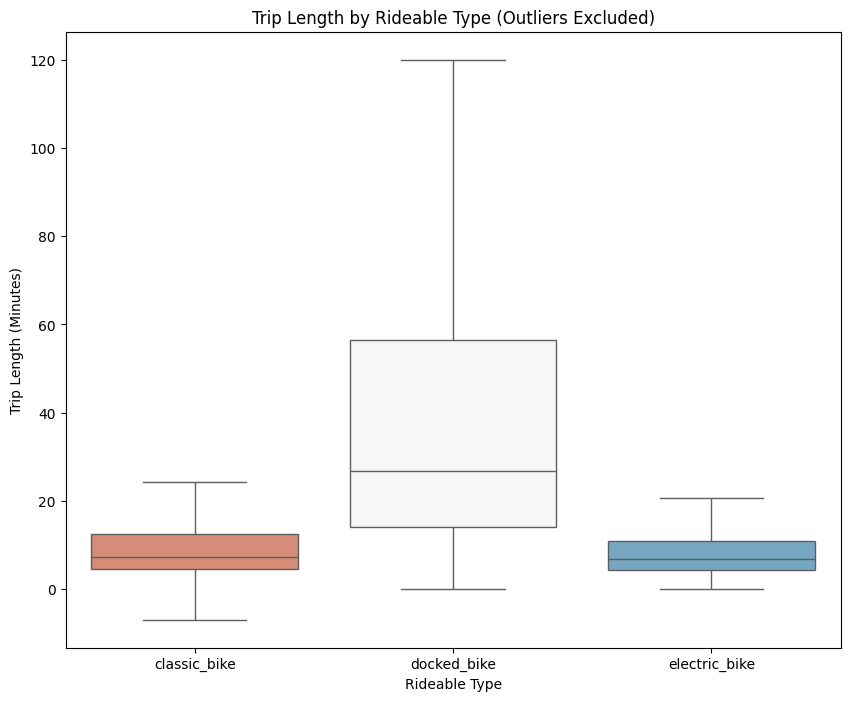

In [293]:
# lets do a quick re-run of the above plots to see how our data is changed, then we will get into a FacetGrid

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df3, palette = "RdBu", showfliers=False)
plt.title('Trip Length by Rideable Type (Outliers Excluded)')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_36747/2013212944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df3, palette = "RdBu", showfliers = False)


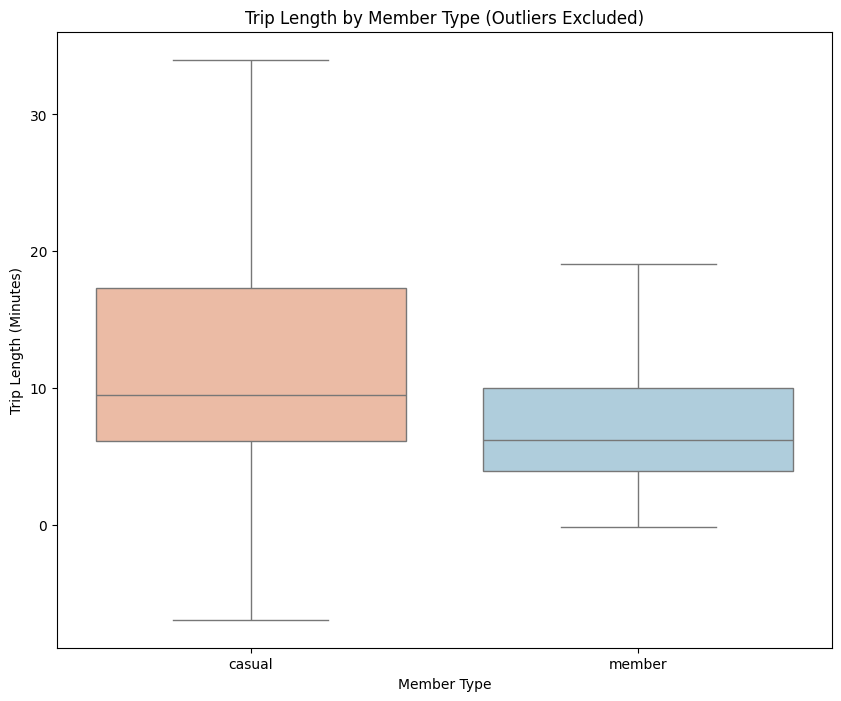

In [295]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df3, palette = "RdBu", showfliers = False)
plt.title('Trip Length by Member Type (Outliers Excluded)')
plt.xlabel('Member Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

/opt/anaconda3/envs/Bike-Sharing/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


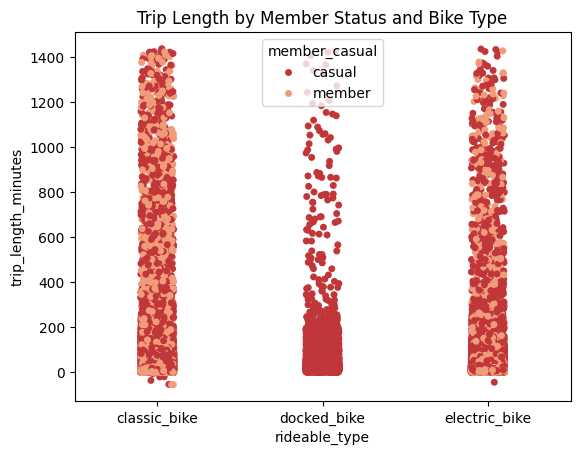

In [330]:

sns.stripplot(x = 'rideable_type', y = 'trip_length_minutes', data = df3, hue = 'member_casual')

plt.title('Trip Length by Member Status and Bike Type')
plt.show()

Our box and whisker plots look very similar, but the strip plot is much more legible and shows the distribution of member types and their rideable preferences with much more clarity.

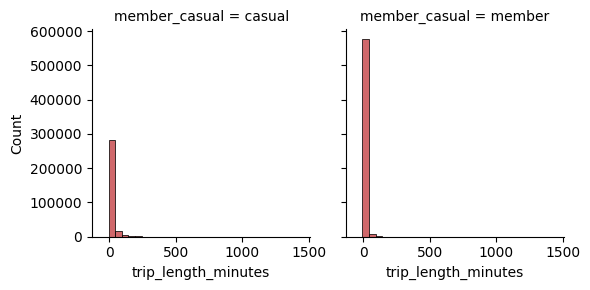

In [332]:
# back to the facetGrid

grid = sns.FacetGrid(df3, col = "member_casual")
grid.map(sns.histplot, "trip_length_minutes", bins = 30)
plt.show()

Despite adjusting the bins several times, this is not very legible. I will need to figure out how to adjust the axis on these or use another unit of measurement... It can be seen that there are more casual riders and the majority of all riders keep their rides pretty short!